<a href="https://colab.research.google.com/github/ronaldvl/PandasIA/blob/main/Introduccion_a_PandasAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PandasAI

PandasAI es una innovadora biblioteca que reinventa la forma en que abordamos el análisis de datos, transformándolo en una experiencia conversacional y entretenida. Esta biblioteca combina la potencia de los DataFrames de Pandas con los modelos de lenguaje más avanzados (LLM), permitiendo a los usuarios realizar análisis de datos de manera natural y enriquecedora, a través de conversaciones interactivas.

## Setup
Para comenzar, necesitamos instalar la última versión de PandasAI.

In [ ]:
!pip install pandasai

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing from a pandas dataframe

To import from a pandas dataframe, you need to import the pandas libraries and create a dataframe first.

In [ ]:
import pandas as pd

In [ ]:
df_chi = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MigrantesChile (2005-2016).xlsx',
                      sheet_name='Migrantes',
                      skipfooter=3)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [ ]:
df_chi

,ID Continent,Continent,ID Country,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,142,Asia,308,Afghanistan,8,4,5,1,2,1,3,6,15,4,12,15
1,150,Europe,518,Albania,2,1,1,2,2,5,3,2,1,2,7,11
2,150,Europe,563,Germany,495,481,562,614,587,644,685,747,687,845,778,582
3,150,Europe,525,Andorra,2,1,1,1,0,0,2,0,1,2,2,1
4,2,Africa,140,Angola,1,2,4,3,2,4,6,8,1,1,13,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2,Africa,136,Uganda,0,0,0,0,0,0,1,0,1,0,1,0
170,19,America,223,Uruguay,1077,1099,1275,1271,1171,1190,1075,1186,956,957,1072,858
171,142,Asia,560,Uzbekistan,2,4,1,2,0,1,2,4,2,1,1,4
172,19,America,201,Venezuela,567,618,773,819,1013,1091,1453,1760,2015,3557,9730,26623


In [ ]:
df_unpivot = pd.melt(df_chi, id_vars=['Continent', 'Country'], value_vars=[2005, 2006, 2007,2008,2009,2010,2011,2012,2013,2014,2015,2016], var_name='Año', value_name='Inmigrant')

#view updated DataFrame
print(df_unpivot)

     Continent      Country   Año  Inmigrant
0         Asia  Afghanistan  2005          8
1       Europe      Albania  2005          2
2       Europe      Germany  2005        495
3       Europe      Andorra  2005          2
4       Africa       Angola  2005          1
...        ...          ...   ...        ...
2083    Africa       Uganda  2016          0
2084   America      Uruguay  2016        858
2085      Asia   Uzbekistan  2016          4
2086   America    Venezuela  2016      26623
2087      Asia      Vietnam  2016          4

[2088 rows x 4 columns]


# SmartDataframe


Un SmartDataFrame es una extensión del DataFrame de Pandas que no solo hereda todas las propiedades y métodos del pd.DataFrame, sino que también incorpora características avanzadas de procesamiento de lenguaje natural, permitiendo así la interacción en lenguaje conversacional de manera fluida.

In [ ]:
from pandasai import SmartDataframe

Dado que PandasAI funciona con un LLM, debe importar el LLM que desea utilizar para su caso de uso. En ese caso usaremos OpenAI.

Para utilizar OpenAI, necesitará un token API. Siga los sencillos pasos a continuación para generar su API_TOKEN con
[openai](https://platform.openai.com/overview).

1.  Vaya a https://openai.com/api/ y regístrese con su dirección de correo electrónico o conecte su cuenta de Google.
2.  Vaya a Ver claves API en el lado izquierdo de la configuración de su cuenta personal.
3.  Seleccione Crear nueva clave secreta.

**Importante:** El acceso API a openai es un servicio pago. Tienes que configurar la facturación.
Por favor lea la información de [Precios](https://platform.openai.com/docs/quickstart/pricing) antes de experimentar.

In [ ]:
from pandasai.llm import OpenAI

llm = OpenAI(api_token="Your Tokren")

Now that we have instantiated the LLM, we can finally instantiate the `SmartDataframe`

In [ ]:
sdf = SmartDataframe(df_unpivot, config={"llm": llm})

A `SmartDataframe` inherits all the methods and properties from the original dataframe. For example:

In [ ]:
sdf[sdf['Country'] == 'United States']

,Continent,Country,Año,Inmigrant
53,America,United States,2005,1984
227,America,United States,2006,1926
401,America,United States,2007,2041
575,America,United States,2008,2377
749,America,United States,2009,2615
923,America,United States,2010,3287
1097,America,United States,2011,3425
1271,America,United States,2012,3976
1445,America,United States,2013,3749
1619,America,United States,2014,3796


But you can also query it in natural language

In [ ]:
sdf.chat("los 5 paises con mas inmigrantes para todos los años")

,Country,Inmigrant
124,Peru,566630
33,Colombia,223590
19,Bolivia,192347
6,Argentina,79747
44,Ecuador,55227


### Plotting a chart

You can also use PandasAI to easily plot a chart

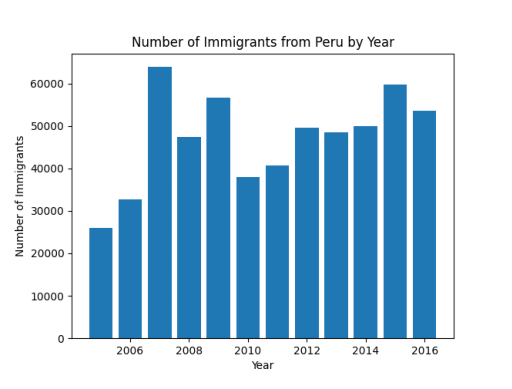

In [ ]:
sdf.chat("grafica un histograma de cantidad de inmigrantes Peru por cada año")

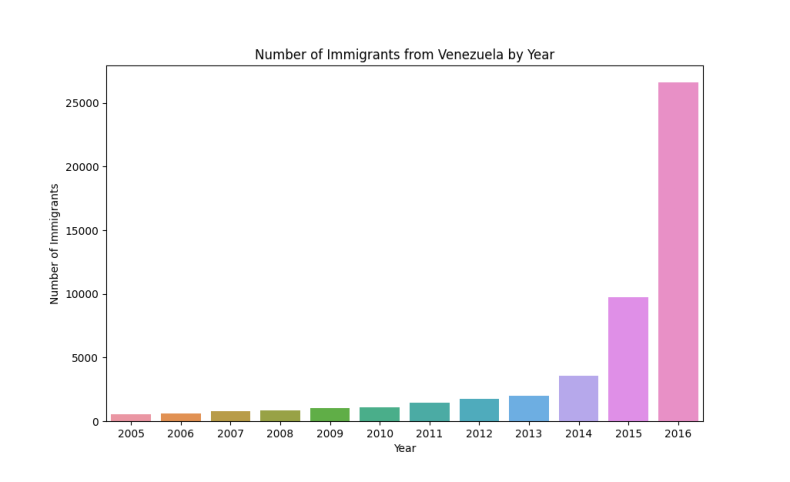

In [ ]:
sdf.chat("haz un grafico de barras en seaborn donde el eje y sea cantidad de inmigrantes del país venezuela y el eje x sea cada año")

### Last code generated

Código utilizado para corregir o ajustar según *necesidad*

In [ ]:
print(sdf.last_code_generated)

def analyze_data(dfs: list[pd.DataFrame]) ->dict:
    """
    Analyze the data
    1. Prepare: Preprocessing and cleaning data if necessary
    2. Process: Manipulating data for analysis (grouping, filtering, aggregating, etc.)
    3. Analyze: Conducting the actual analysis (if the user asks to plot a chart save it to an image in exports/charts/temp_chart.png and do not show the chart.)
    4. Output: return a dictionary of:
    - type (possible values "text", "number", "dataframe", "plot")
    - value (can be a string, a dataframe or the path of the plot, NOT a dictionary)
    Example output: { "type": "text", "value": "The average loan amount is $15,000." }
    """
    df = dfs[0]
    df_venezuela = df[df['Country'] == 'Venezuela']
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Año', y='Inmigrant', data=df_venezuela)
    plt.xlabel('Year')
    plt.ylabel('Number of Immigrants')
    plt.title('Number of Immigrants from Venezuela by Year')
    plt.savefig('exports/charts/temp_chart

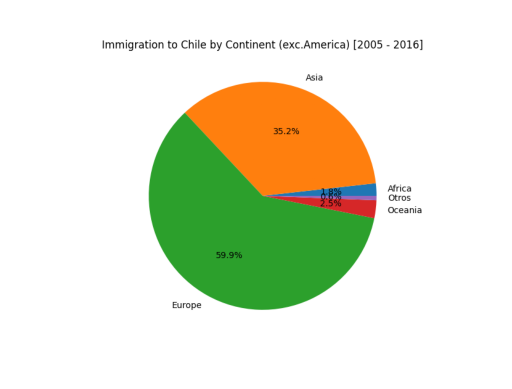

In [ ]:
sdf.chat("haz gráfico de torta por cantidad de inmigrantes para cada continente, ponle como título: Immigration to Chile by Continent (exc.America) [2005 - 2016], ademas utiliza plt.legend(labels=df_rest_continents.index, loc='upper left')")

In [ ]:
print(sdf.last_code_generated)

def analyze_data(dfs: list[pd.DataFrame]) ->dict:
    """
    Analyze the data
    1. Prepare: Preprocessing and cleaning data if necessary
    2. Process: Manipulating data for analysis (grouping, filtering, aggregating, etc.)
    3. Analyze: Conducting the actual analysis (if the user asks to plot a chart save it to an image in exports/charts/temp_chart.png and do not show the chart.)
    4. Output: return a dictionary of:
    - type (possible values "text", "number", "dataframe", "plot")
    - value (can be a string, a dataframe or the path of the plot, NOT a dictionary)
    Example output: { "type": "text", "value": "The average loan amount is $15,000." }
    """
    df = dfs[0]
    df_rest_continents = df[df['Continent'] != 'America'].groupby('Continent')['Inmigrant'].sum()
    plt.figure(figsize=(8, 6))
    plt.pie(df_rest_continents, labels=df_rest_continents.index, autopct='%1.1f%%')
    plt.title('Immigration to Chile by Continent (exc.America) [2005 - 2016]')
    plt.savefig(

# Atajos

Como alternativa, puede utilizar "atajos". Los atajos son funciones que evitan que usted escriba un mensaje y "haga la magia" bajo el capó por usted.

Por ejemplo, puedes usar `.plot_bar_chart()` para generar el mismo gráfico, proporcionando el campo:

In [ ]:
sdf.plot_bar_chart(x="continent", y="immigrants in thousands")

So for example if we want to visualize as a pie chart, you can instead call the `plot_pie_chart` shortcut, passing the field we want ot use as labels and the one we want to use as values.

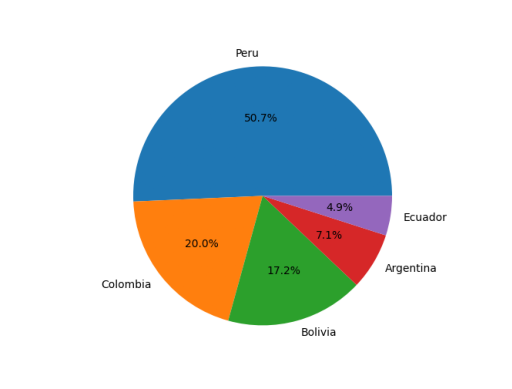

In [ ]:
sdf.plot_pie_chart(labels="top 5 countries", values="inmigrants")

# SmartDatalake

A veces, es posible que desee trabajar con varios marcos de datos a la vez, permitiendo que el LLM orqueste cuál usar para responder sus consultas. En tales casos, en lugar de utilizar un SmartDataframe, debería utilizar un SmartDatalake.

El concepto es muy similar al SmartDataframe, pero en lugar de aceptar solo 1 df como entrada, puede aceptar varios.

In [ ]:
from pandasai import SmartDatalake

For example, in this example, we are provided with 2 different dfs.
In the first one, it's reported for each employee, an employee id, a name and a department.
In the second one, instad, it's provided the employee id and the salary for each employee.

Asking PandasAI, it will join the 2 different dataframes by id and figure out the name of the one that is paid the most.

In [ ]:
employees_df = pd.DataFrame(
    {
        "EmployeeID": [1, 2, 3, 4, 5],
        "Name": ["John", "Emma", "Liam", "Olivia", "William"],
        "Department": ["HR", "Sales", "IT", "Marketing", "Finance"],
    }
)

salaries_df = pd.DataFrame(
    {
        "EmployeeID": [1, 2, 3, 4, 5],
        "Salary": [5000, 6000, 4500, 7000, 5500],
    }
)

lake = SmartDatalake(
    [employees_df, salaries_df],
    config={"llm": llm}
)
lake.chat("Who gets paid the most?")

'The employee who gets paid the most is Olivia.'

Here's an example of the code that is generated:

In [ ]:
print(lake.last_code_executed)

def analyze_data(dfs: list[pd.DataFrame]) ->dict:
    """
    Analyze the data
    1. Prepare: Preprocessing and cleaning data if necessary
    2. Process: Manipulating data for analysis (grouping, filtering, aggregating, etc.)
    3. Analyze: Conducting the actual analysis (if the user asks to plot a chart save it to an image in exports/charts/temp_chart.png and do not show the chart.)
    4. Output: return a dictionary of:
    - type (possible values "text", "number", "dataframe", "plot")
    - value (can be a string, a dataframe or the path of the plot, NOT a dictionary)
    Example output: { "type": "text", "value": "The average loan amount is $15,000." }
    """
    merged_df = pd.merge(dfs[0], dfs[1], on='EmployeeID')
    max_salary_employee = merged_df.loc[merged_df['Salary'].idxmax()]
    return {'type': 'text', 'value': f"The employee who gets paid the most is {max_salary_employee['Name']}."}


Ok in this case it was easy: both the tables are share a common value called `EmployeeID`, right?

Let's try with something more complex

In [ ]:
users_df = pd.DataFrame(
    {
        "id": [1, 2, 3, 4, 5],
        "name": ["John", "Emma", "Liam", "Olivia", "William"]
    }
)
users = SmartDataframe(users_df, name="users")

photos_df = pd.DataFrame(
    {
        "id": [31, 32, 33, 34, 35],
        "user_id": [1, 1, 2, 4, 5]
    }
)
photos = SmartDataframe(photos_df, name="photos")

lake = SmartDatalake([users, photos], config={"llm": llm})
lake.chat("How many photos has been uploaded by John?")

2

In this case we provided for each df a table name, so that the LLM has some context and can better perform the joins. As you can see on the example below, it succeeded at figuring out the right join to do. In fact, the user "John" has actually 2 photos.

In [ ]:
print(lake.last_code_executed)

def analyze_data(dfs: list[pd.DataFrame]) ->dict:
    """
    Analyze the data
    1. Prepare: Preprocessing and cleaning data if necessary
    2. Process: Manipulating data for analysis (grouping, filtering, aggregating, etc.)
    3. Analyze: Conducting the actual analysis (if the user asks to plot a chart save it to an image in exports/charts/temp_chart.png and do not show the chart.)
    4. Output: return a dictionary of:
    - type (possible values "text", "number", "dataframe", "plot")
    - value (can be a string, a dataframe or the path of the plot, NOT a dictionary)
    Example output: { "type": "text", "value": "The average loan amount is $15,000." }
    """
    users = dfs[0]
    photos = dfs[1]
    john_id = users.loc[users['name'] == 'John', 'id'].values[0]
    john_photos = photos.loc[photos['user_id'] == john_id]
    num_photos = len(john_photos)
    return {'type': 'number', 'value': num_photos}
